In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('customer_churn_data.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [5]:
df['InternetService'] = df['InternetService'].fillna("")

In [6]:
df.isna().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [9]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [10]:
numeric_column_data = df.select_dtypes(include=['number'])

In [11]:
numeric_column_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [12]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

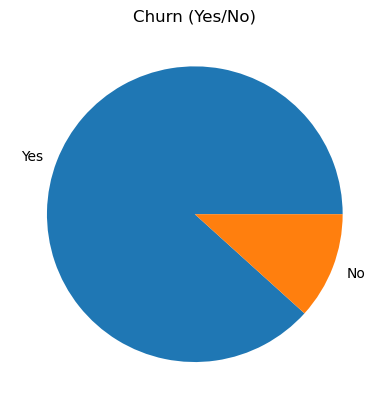

In [13]:
df['Churn'].value_counts().plot(kind='pie')
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [14]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [15]:
df.groupby("Churn")['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [16]:
df.groupby(["Churn","Gender"])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [17]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [18]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [19]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

At the lower terms we can see that the monthly charge average decreases

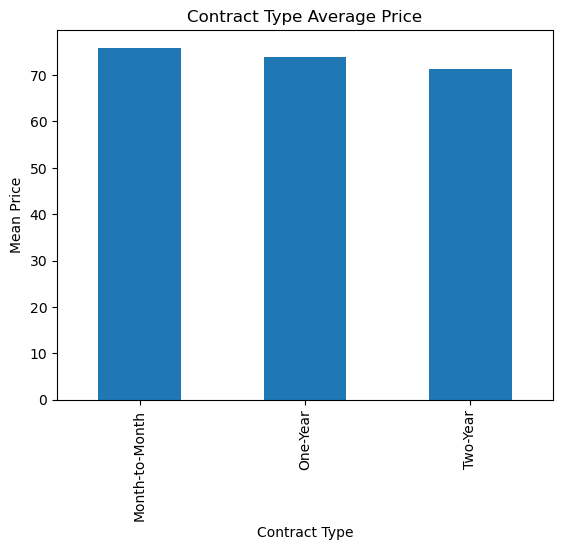

In [20]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Contract Type Average Price")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.show()

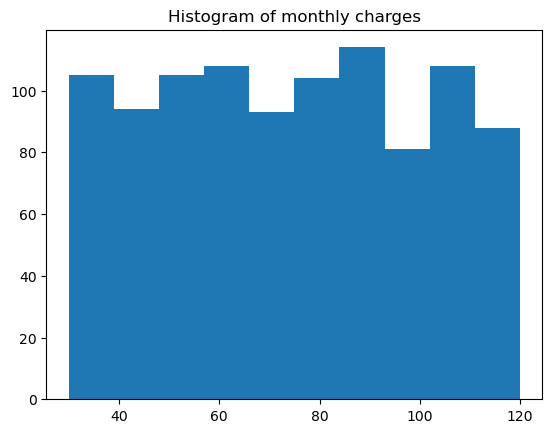

In [21]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of monthly charges")
plt.show()

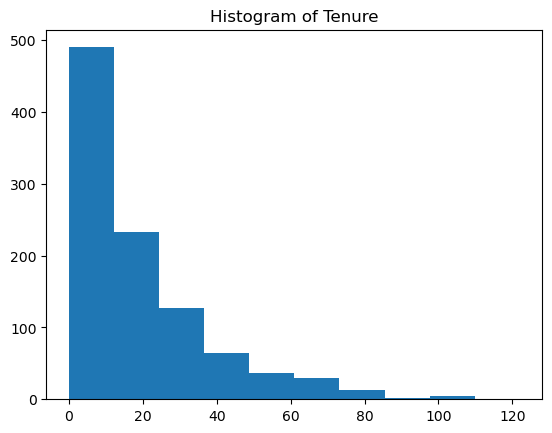

In [22]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [23]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [24]:
y = df["Churn"]
x = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [25]:
y.value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [26]:
type(y)

pandas.core.series.Series

In [27]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [28]:
type(x)

pandas.core.frame.DataFrame

In [29]:
x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Female" else 0)

C:\Users\faizan\AppData\Local\Temp\ipykernel_24740\2979086490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [30]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [31]:
type(x["Gender"][0])

numpy.int64

In [32]:
y.value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [33]:
y = y.apply(lambda x: 1 if x == "Yes" else 0)

In [34]:
y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [35]:
type(y[0])

numpy.int64

In [36]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Churn
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [37]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [40]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
x_test = scaler.fit_transform(x_test)

In [42]:
from sklearn.metrics import accuracy_score
def modelperformance(prediction):
    print('Accuracy score on model is {}'.format(accuracy_score(y_test, prediction)))

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_model = LogisticRegression()

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
y_train

325    1
885    1
496    1
866    1
394    1
      ..
82     1
874    1
770    1
84     1
144    0
Name: Churn, Length: 800, dtype: int64

In [48]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [49]:
y_pred = log_model.predict(x_test)

In [50]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
param_grid = {
    "n_neighbors" : [3,5,7,9],
    "weights" : ["uniform","distance"]
}

In [53]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [54]:
gridkn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [55]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [56]:
y_pred = gridkn.predict((x_test))

In [57]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [58]:
from sklearn.svm import SVC

In [59]:
svm = SVC()

In [60]:
param_grid = {
    "C" : [0.01, 0.1, 0.5, 1],
    "kernel" : ["linear", "rbf", "poly"]
}

In [61]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [62]:
gridsvc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [63]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [64]:
y_pred = gridsvc.predict(x_test)

In [65]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
param_grid = {
    "criterion" : ["gini","entropy"],
    "splitter" : ["best","random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [68]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [69]:
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [71]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

In [72]:
y_pred = grid_tree.predict(x_test)

In [73]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1], dtype=int64)

In [74]:
modelperformance(y_pred)

Accuracy score on model is 0.875


In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [80]:
param_grid = {
    "n_estimators" : [32,64,128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True, False]
}

In [81]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [82]:
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [83]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [86]:
y_pred = grid_rfc.predict(x_test)

In [87]:
modelperformance(y_pred)

Accuracy score on model is 0.86


In [88]:
best_model = gridsvc.best_estimator_

In [89]:
best_model

SVC(C=0.01, kernel='linear')

In [90]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [91]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')